Einführung in die Monte Carlo-Simulation als Methode zur Modellierung von Finanzinstrumenten.

Erklärung des Ziels: Vorhersage der zukünftigen Preisentwicklung der Apple-Aktien durch Simulation.


Verwendung von Bibliotheken wie NumPy und pandas in Python.

In [72]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 
import yfinance as yf
from scipy.stats import norm
from scipy.optimize import fsolve

Grundlegende Begriffe:

Definition von Aktienkurs, täglicher Zuwachs und Volatilität.
Erklärung der Annahme eines stetigen Modells für die Preisentwicklung.

In [73]:


# Definieren Sie den Zeitraum (start und end)
start = '2022-01-01'
end = datetime.today().strftime('%Y-%m-%d')

# Symbol für Apple ist 'AAPL'
symbol = 'AAPL'

# Daten mit yfinance abrufen
apple = yf.download(symbol, start=start, end=end)

# Daten anzeigen
print(apple)


[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669998   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.944000   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056961   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   
...                ...         ...         ...         ...         ...   
2023-12-14  198.020004  199.619995  196.160004  198.110001  198.110001   
2023-12-15  197.529999  198.399994  197.000000  197.570007  197.570007   
2023-12-18  196.089996  196.630005  194.389999  195.889999  195.889999   
2023-12-19  196.160004  196.949997  195.889999  196.940002  196.940002   
2023-12-20  196.899994  197.679993  194.830

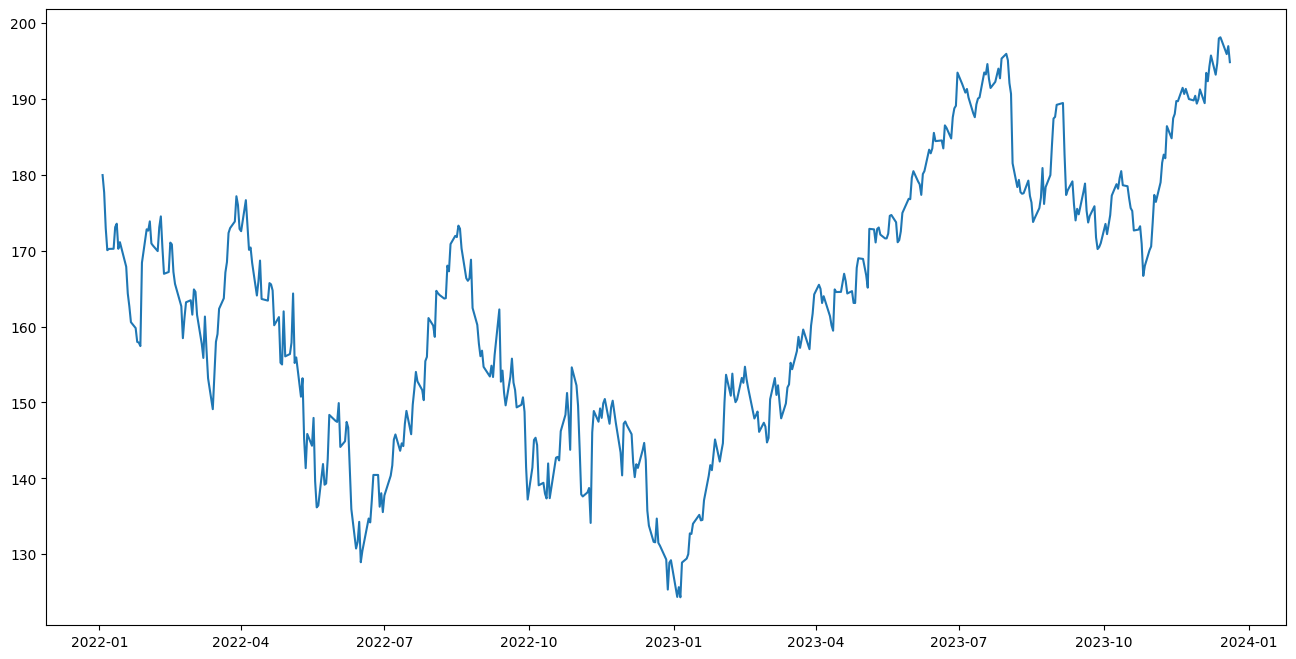

In [74]:
plt.figure(figsize=(16, 8))
plt.plot(apple["Adj Close"])

In [75]:
last_price = apple["Adj Close"][-1]
print(last_price)

194.8300018310547


/var/folders/2g/2kljx72s71qfpqfsl03p810w0000gn/T/ipykernel_98899/1812332437.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_price = apple["Adj Close"][-1]


In [76]:
returns = apple["Adj Close"].pct_change()
print(returns)

Date
2022-01-03         NaN
2022-01-04   -0.012692
2022-01-05   -0.026600
2022-01-06   -0.016693
2022-01-07    0.000988
                ...   
2023-12-14    0.000758
2023-12-15   -0.002726
2023-12-18   -0.008503
2023-12-19    0.005360
2023-12-20   -0.010714
Name: Adj Close, Length: 495, dtype: float64


Einführung der Normalverteilung als Wahrscheinlichkeitsverteilung.
Bedeutung von Mittelwert und Standardabweichung in der Normalverteilung.

In [77]:
daily_vol = returns.std()

In [78]:
num_sim = 1000
num_days = 30

Darstellung der Formel: 
Neuer Aktienkurs=Alter Aktienkurs×(1+Zufallszahl)×Volatilitat
Interpretation der Formelkomponenten

Erstellung einer Schleife für die Simulation von mehreren Szenarien (Monte Carlo-Simulation).

In [79]:
simulation_df = pd.DataFrame()
price_series = []

for i in range(num_sim):
    price_series.clear()
    counter = 0
    
    price = last_price * (1+ np.random.normal(0, daily_vol)) # bedeutung der 0, i.A. steht da mu
    #was heisst eig normalverteilung 
    price_series.append(price)
    
    for x in range(num_days):
        if counter == 29:
            break 
            
        price = price_series[counter] * (1+ np.random.normal(0, daily_vol))
        price_series.append(price)
        counter += 1
        
    simulation_df[i] = price_series

/var/folders/2g/2kljx72s71qfpqfsl03p810w0000gn/T/ipykernel_98899/2934510909.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[i] = price_series


Berechnung des Mittelwerts und der Streuung der simulierten Aktienpreise.
Diskussion über die Interpretation von Mittelwert und Streuung in Bezug auf die Simulationsergebnisse.

In [80]:
simulation_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,186.763195,201.978475,194.187098,190.399655,193.901229,196.239118,193.401810,189.580124,194.018633,192.992474,...,191.080482,199.692657,190.616571,193.143438,193.626605,200.463358,191.220778,188.599714,198.364019,197.864735
1,185.622443,205.735457,192.314149,191.416514,192.897751,197.874135,189.938100,188.905370,200.406490,198.111126,...,186.389999,200.242884,194.817426,191.176126,188.797224,202.516378,188.751104,186.534753,190.676100,198.760447
2,190.506780,206.195733,189.704879,194.411068,194.600596,200.437380,187.942125,193.066671,199.028794,195.889365,...,185.322978,202.025299,200.008779,185.189052,194.849521,205.482357,187.517584,192.767749,190.195475,194.063978
3,191.521764,205.444908,192.619245,189.102497,194.704346,197.286965,183.947208,191.672478,199.869682,193.353693,...,177.253615,202.330466,197.315101,187.486248,197.206802,206.567497,187.268083,196.462662,192.169086,198.112398
4,187.845116,206.349015,191.718583,189.668325,201.999553,196.220717,187.391781,196.085224,208.048005,193.443359,...,181.158934,205.915808,197.884483,184.170919,195.947710,209.593675,186.188453,197.217758,191.724868,201.464532
5,188.948222,202.488027,199.598349,189.975771,204.056903,202.381666,189.422538,201.208119,207.322882,192.681437,...,180.389572,197.609736,198.371148,185.035305,197.716939,207.747870,184.116991,197.963752,198.929242,200.949487
6,184.446422,204.941277,200.061846,191.071922,200.325971,202.540176,190.725294,209.473591,208.236075,196.071226,...,177.699749,199.176400,194.502185,183.663019,196.308986,210.458977,181.566632,199.922499,201.122410,202.042239
7,187.443762,200.103192,201.033737,184.138611,197.023994,202.371013,189.110632,207.767390,213.641313,198.997278,...,178.588186,198.679609,194.573511,180.684360,196.402735,214.303403,181.430423,193.799364,204.878036,202.808074
8,189.343230,202.171448,210.061123,184.250933,189.904763,204.077205,193.158796,211.659161,210.656684,202.785796,...,172.119340,196.633104,196.535464,178.060568,197.308821,210.030613,182.895733,191.851146,211.906122,204.296473
9,183.242477,203.960522,209.678210,184.132941,195.875850,199.316620,195.362417,214.591089,211.883849,195.473433,...,174.095145,195.185086,188.107427,174.051534,200.015751,210.544414,182.700792,192.370728,218.871945,202.235012


Erstellung von Diagrammen, um die simulierten Preisverläufe zu visualisieren.
Hervorhebung von Trends oder Mustern in den Simulationsergebnissen.

/var/folders/2g/2kljx72s71qfpqfsl03p810w0000gn/T/ipykernel_98899/4115602762.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(apple["Adj Close"][-1], color = "r")


<function matplotlib.pyplot.show(close=None, block=None)>

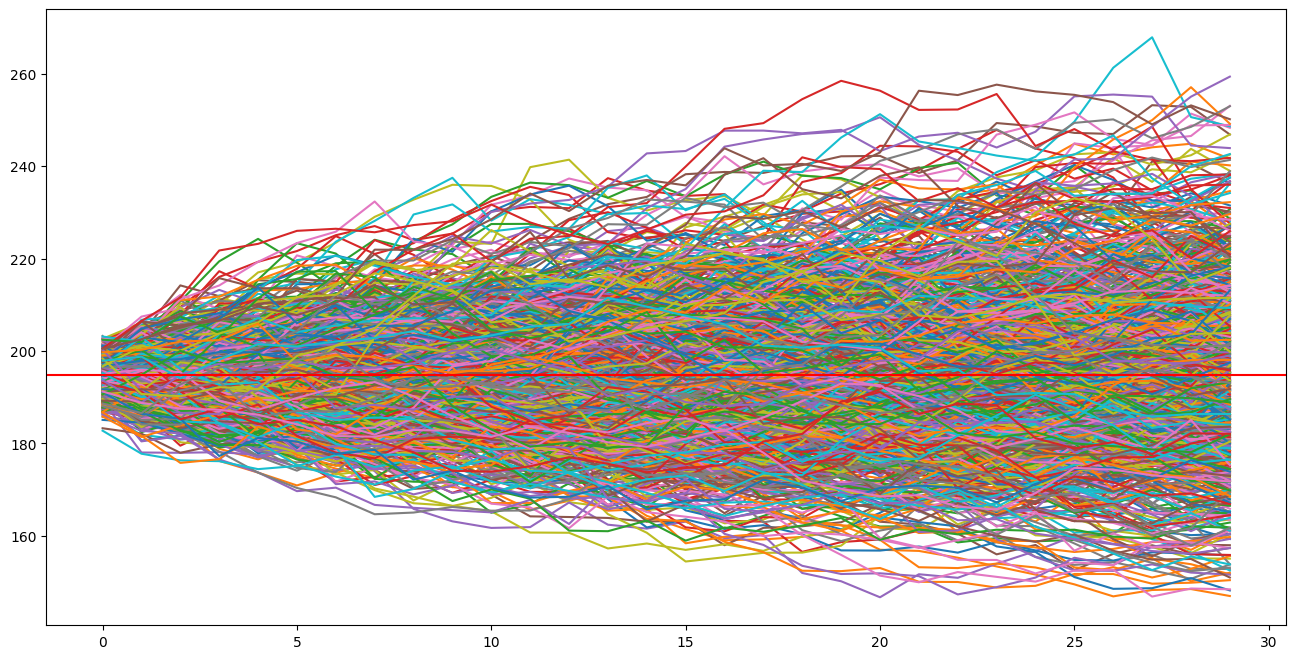

In [81]:
plt.figure(figsize=(16, 8))
plt.plot(simulation_df)
plt.axhline(apple["Adj Close"][-1], color = "r")
plt.show

Diskussion möglicher Limitationen und Unsicherheiten in der Simulation.

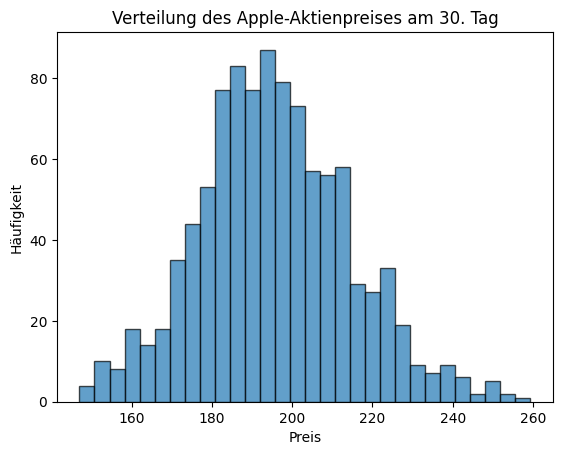

In [89]:
last_day_results   = simulation_df.iloc[-1, :]

# Plot Histogramm
plt.hist(last_day_results, bins=30, edgecolor='black', alpha=0.7)
plt.title('Verteilung des Apple-Aktienpreises am 30. Tag')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')
plt.show()

Erklärung des Boxplots als grafische Darstellung von Quartilen, Median und Ausreißern.

Diskussion möglicher Abweichungen zwischen simulierten und historischen Daten.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


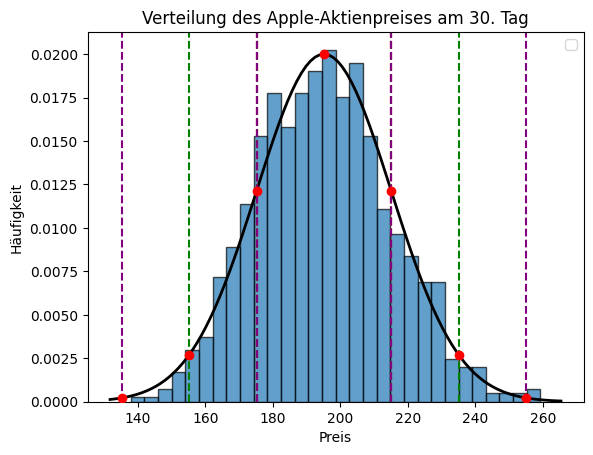

In [83]:

# wird Plot als Histogramm erstellt
plt.hist(last_day_results, bins=30, density=True, edgecolor='black', alpha=0.7)

# Schätzung der Normalverteilungsfunktion
mu, sigma = np.mean(last_day_results), np.std(last_day_results)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Plot der Normalverteilungsfunktion
plt.plot(x, p, 'k', linewidth=2)

plt.title('Verteilung des Apple-Aktienpreises am 30. Tag')
plt.xlabel('Preis')
plt.ylabel('Häufigkeit')

# Finden der Stelle für das Maximum
max_point = x[np.argmax(p)]

# Plot roten Punkt am Maximum
plt.scatter(max_point, norm.pdf(max_point, mu, sigma), color='red', zorder=5)



# Berechne Schnittpunkte der Linien mit der Normalverteilungsfunktion
def find_intersection(x):
    return norm.pdf(x, mu, sigma) - norm.pdf(mu - sigma, mu, sigma)

intersection_left = fsolve(find_intersection, mu - sigma)[0]
intersection_right = fsolve(find_intersection, mu + sigma)[0]

# Plot rote senkrechte Linie links vom Mittelwert bis zum Schnittpunkt
plt.axvline(mu - sigma, color='red', linestyle='--')
plt.axvline(intersection_left, color='red', linestyle='--')

# Plot rote senkrechte Linie rechts vom Mittelwert bis zum Schnittpunkt
plt.axvline(mu + sigma, color='red', linestyle='--')
plt.axvline(intersection_right, color='red', linestyle='--')

# Plot roten Punkt an den Schnittpunkten
plt.scatter([intersection_left, intersection_right], [norm.pdf(intersection_left, mu, sigma), norm.pdf(intersection_right, mu, sigma)], color='red', zorder=5)


# Berechne Schnittpunkte der Linien mit der Normalverteilungsfunktion
def find_intersection(x):
    return norm.pdf(x, mu, sigma) - norm.pdf(mu - 2 * sigma, mu, sigma)

intersection_left = fsolve(find_intersection, mu - 2* sigma)[0]
intersection_right = fsolve(find_intersection, mu + 2* sigma)[0]

# Plot rote senkrechte Linie links vom Mittelwert bis zum Schnittpunkt
plt.axvline(mu - sigma, color='green', linestyle='--')
plt.axvline(intersection_left, color='green', linestyle='--')

# Plot rote senkrechte Linie rechts vom Mittelwert bis zum Schnittpunkt
plt.axvline(mu + sigma, color='green', linestyle='--')
plt.axvline(intersection_right, color='green', linestyle='--')

# Plot roten Punkt an den Schnittpunkten
plt.scatter([intersection_left, intersection_right], [norm.pdf(intersection_left, mu, sigma), norm.pdf(intersection_right, mu, sigma)], color='red', zorder=5)


# Berechne Schnittpunkte der Linien mit der Normalverteilungsfunktion
def find_intersection(x):
    return norm.pdf(x, mu, sigma) - norm.pdf(mu - 3*sigma, mu, sigma)

intersection_left = fsolve(find_intersection, mu - 3*sigma)[0]
intersection_right = fsolve(find_intersection, mu + 3*sigma)[0]

# Plot rote senkrechte Linie links vom Mittelwert bis zum Schnittpunkt
plt.axvline(mu - sigma, color='purple', linestyle='--')
plt.axvline(intersection_left, color='purple', linestyle='--')

# Plot rote senkrechte Linie rechts vom Mittelwert bis zum Schnittpunkt
plt.axvline(mu + sigma, color='purple', linestyle='--')
plt.axvline(intersection_right, color='purple', linestyle='--')

# Plot roten Punkt an den Schnittpunkten
plt.scatter([intersection_left, intersection_right], [norm.pdf(intersection_left, mu, sigma), norm.pdf(intersection_right, mu, sigma)], color='red', zorder=5)

plt.legend()
plt.show()


In [84]:
print("Mittelwert: " + str(last_day_results.mean()))
print("Median: " + str(last_day_results.median()))
print("Standartabweichung: " + str(last_day_results.std()))


Mittelwert: 195.13213909244084
Median: 194.69010399110604
Standartabweichung: 19.960899091474282


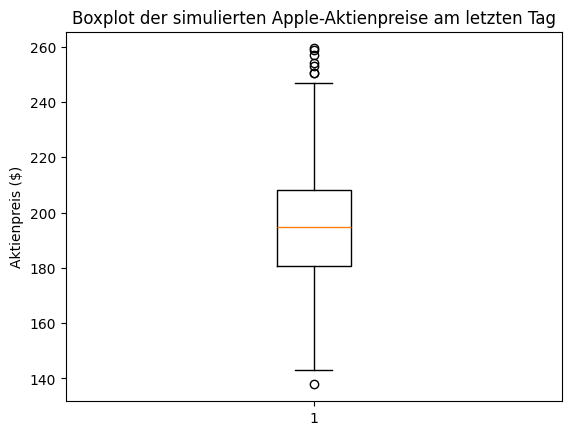

In [85]:
# Boxplot erstellen
plt.boxplot(last_day_results)
plt.title('Boxplot der simulierten Apple-Aktienpreise am letzten Tag')
plt.ylabel('Aktienpreis ($)')
plt.show()

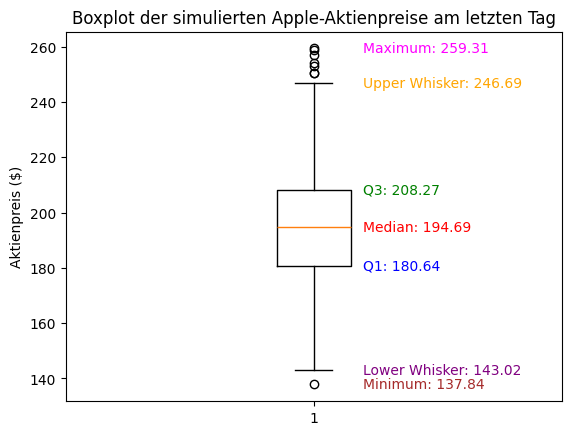

In [86]:

# Boxplot erstellen und Whiskers mit 1,5-fachem Interquartilabstand setzen
boxplot = plt.boxplot(last_day_results, whis=1.5)

# Quartile-Werte abrufen
q1_value = round(np.percentile(last_day_results, 25), 2)
q3_value = round(np.percentile(last_day_results, 75), 2)

# Median-Wert abrufen
median_value = round(np.median(last_day_results), 2)

# Whisker-Werte abrufen
lower_whisker = round(boxplot['whiskers'][0].get_ydata()[1], 2)
upper_whisker = round(boxplot['whiskers'][1].get_ydata()[1], 2)

# Minimum- und Maximum-Werte abrufen
min_value = round(np.min(last_day_results), 2)
max_value = round(np.max(last_day_results), 2)

# Text für den Median-Wert hinzufügen
plt.text(1.10, median_value, f'Median: {median_value}', color='red', fontsize=10, verticalalignment='center')

# Text für das 1. Quartil hinzufügen
plt.text(1.10, q1_value, f'Q1: {q1_value}', color='blue', fontsize=10, verticalalignment='center')

# Text für das 3. Quartil hinzufügen
plt.text(1.10, q3_value, f'Q3: {q3_value}', color='green', fontsize=10, verticalalignment='center')

# Text für den unteren Whisker hinzufügen
plt.text(1.10, lower_whisker, f'Lower Whisker: {lower_whisker}', color='purple', fontsize=10, verticalalignment='center')

# Text für den oberen Whisker hinzufügen
plt.text(1.10, upper_whisker, f'Upper Whisker: {upper_whisker}', color='orange', fontsize=10, verticalalignment='center')


# Text für den Minimum-Wert hinzufügen
plt.text(1.10, min_value, f'Minimum: {min_value}', color='brown', fontsize=10, verticalalignment='center')

# Text für den Maximum-Wert hinzufügen
plt.text(1.10, max_value, f'Maximum: {max_value}', color='magenta', fontsize=10, verticalalignment='center')


# Diagramm beschriften
plt.title('Boxplot der simulierten Apple-Aktienpreise am letzten Tag')
plt.ylabel('Aktienpreis ($)')

# Diagramm anzeigen
plt.show()


Zusammenfassung der Ergebnisse und Schlussfolgerungen.
Reflexion über die Anwendbarkeit der Monte Carlo-Simulation auf die Vorhersage von Aktienkursen.

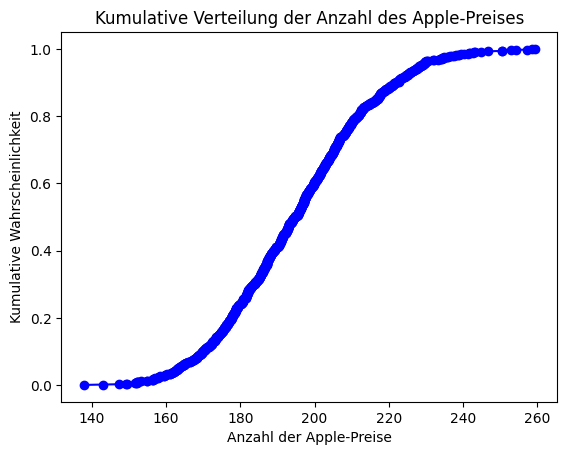

In [87]:
sorted_data = np.sort(last_day_results)
cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.plot(sorted_data, cumulative_prob, marker='o', linestyle='-', color='b')
#plt.hist(last_day_results, bins=30, density=True, cumulative=True, alpha=0.7, color='b', edgecolor='k')
plt.xlabel('Anzahl der Apple-Preise')
plt.ylabel('Kumulative Wahrscheinlichkeit')
plt.title('Kumulative Verteilung der Anzahl des Apple-Preises')
plt.show()

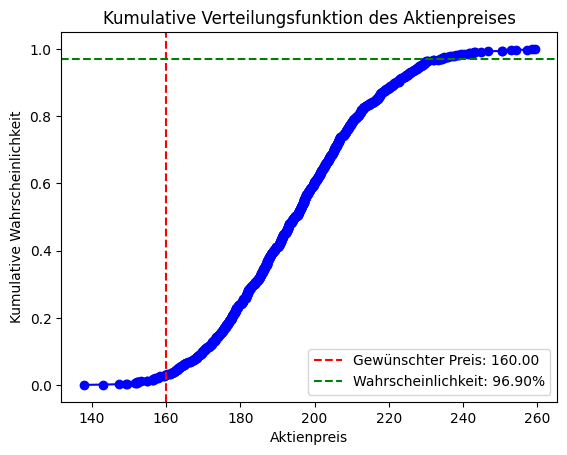

Die Wahrscheinlichkeit, dass der Aktienpreis mindestens 160.00 erreicht, beträgt 96.90%


In [88]:

# Definiere den gewünschten Preis x (wert nach unserer frage anpassen)
x_value =  160.00

# Finde den Index des ersten Elements in der sortierten Datenliste, das größer oder gleich x ist
index_x = np.searchsorted(sorted_data, x_value, side='right')

# Berechne die kumulierte Wahrscheinlichkeit, dass der Preis mindestens x ist
probability_x = 1 - cumulative_prob[index_x - 1] if index_x > 0 else 0

# Plot der kumulativen Verteilungsfunktion
plt.plot(sorted_data, cumulative_prob, marker='o', linestyle='-', color='b')
plt.xlabel('Aktienpreis')
plt.ylabel('Kumulative Wahrscheinlichkeit')
plt.title('Kumulative Verteilungsfunktion des Aktienpreises')

# Markiere den gewünschten Preis auf der X-Achse
plt.axvline(x=x_value, color='r', linestyle='--', label=f'Gewünschter Preis: {x_value:.2f}')

# Markiere die kumulierte Wahrscheinlichkeit auf der Y-Achse
plt.axhline(y=probability_x, color='g', linestyle='--', label=f'Wahrscheinlichkeit: {probability_x:.2%}')

# Anzeigen des Plots
plt.legend()
plt.show()

# Ausgabe der berechneten Wahrscheinlichkeit
print(f'Die Wahrscheinlichkeit, dass der Aktienpreis mindestens {x_value:.2f} erreicht, beträgt {probability_x:.2%}')


Test123